# Trabajo práctico integrador 
## _Análisis de datos_
## CEIA Co12

### Grupo 2:
1. Córdoba, Pablo
2. Ferrán, Natanael
3. Pérez Millán, Rodrigo

### Dataset:
- [Global Data on Sustainable Energy (2000-2020)](https://www.kaggle.com/datasets/anshtanwar/global-data-on-sustainable-energy)

### Posibles cuestiones a resolver:
- Clusterizar los países, según su nivel de emisiones de CO2.
- Clusterizar los países, según su dedicación para con la emigración hacia las energías renovables.
- Encontrar oportunidades de inversión, a partir del análisis de capacidad instalada vs demanda vs emisiones de CO2 (si contaminan mucho, hay demanda creciente y poca capacidad instalada, habría una buena oportunidad de inversión)

***

In [1]:
# importing needed libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# reading the file

url= 'https://raw.githubusercontent.com/nferran/tp_final_analisis_de_datos/main/global-data-on-sustainable-energy.csv'
df= pd.read_csv(url)

## Análisis exploratorio inicial

In [3]:
# showing first 5 rows

df.head()

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.93911,67.709953


In [4]:
# showing a summary of 5 relevant numeric features

five_numeric_columns = ['Renewable-electricity-generating-capacity-per-capita','Electricity from renewables (TWh)',r'Renewables (% equivalent primary energy)','Value_co2_emissions_kt_by_country','Primary energy consumption per capita (kWh/person)']
df[five_numeric_columns].describe()

,Renewable-electricity-generating-capacity-per-capita,Electricity from renewables (TWh),Renewables (% equivalent primary energy),Value_co2_emissions_kt_by_country,Primary energy consumption per capita (kWh/person)
count,2718.000000,3628.000000,1512.000000,3.221000e+03,3649.000000
mean,113.137498,23.968010,11.986707,1.598665e+05,25743.981745
std,244.167256,104.431085,14.994644,7.736611e+05,34773.221366
min,0.000000,0.000000,0.000000,1.000000e+01,0.000000
25%,3.540000,0.040000,2.137095,2.020000e+03,3116.737300
50%,32.910000,1.470000,6.290766,1.050000e+04,13120.570000
75%,112.210000,9.600000,16.841638,6.058000e+04,33892.780000
max,3060.190000,2184.940000,86.836586,1.070722e+07,262585.700000


In [5]:
# showing features' types

df.dtypes

Entity                                                               object
Year                                                                  int64
Access to electricity (% of population)                             float64
Access to clean fuels for cooking                                   float64
Renewable-electricity-generating-capacity-per-capita                float64
Financial flows to developing countries (US $)                      float64
Renewable energy share in the total final energy consumption (%)    float64
Electricity from fossil fuels (TWh)                                 float64
Electricity from nuclear (TWh)                                      float64
Electricity from renewables (TWh)                                   float64
Low-carbon electricity (% electricity)                              float64
Primary energy consumption per capita (kWh/person)                  float64
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         float64
Value_co2_em

In [6]:
# updating incorrect data type

df.loc[:,r'Density\n(P/Km2)'] = df.loc[:,r'Density\n(P/Km2)'].str.replace(',','').astype(float)

In [7]:
# checking features' types

df.dtypes

Entity                                                               object
Year                                                                  int64
Access to electricity (% of population)                             float64
Access to clean fuels for cooking                                   float64
Renewable-electricity-generating-capacity-per-capita                float64
Financial flows to developing countries (US $)                      float64
Renewable energy share in the total final energy consumption (%)    float64
Electricity from fossil fuels (TWh)                                 float64
Electricity from nuclear (TWh)                                      float64
Electricity from renewables (TWh)                                   float64
Low-carbon electricity (% electricity)                              float64
Primary energy consumption per capita (kWh/person)                  float64
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         float64
Value_co2_em

## Clusterización de países según su nivel de emisiones de CO2

A fin de intentar resolver esta cuestión, podríamos trabajar con las columnas "Entity"(nombres de los países: _variable identificatoria_), "Year"(_fecha_), "Value_co2_emissions_kt_by_country"(_variable numérica_), "Electricity from fossil fuels (TWh)"(_variable numérica_), "Primary energy consumption per capita (kWh/person)"(_variable numérica_), "gdp_per_capita"(_variable numérica_) y "Density\n(P/Km2)" (_variable numérica_).

Al ser un problema de aprendizaje no supervisado, solo tendremos variables de entrada.

In [8]:
# checking distributions' skewness

print(f'CO2 emissions distribution skewness: {df.Value_co2_emissions_kt_by_country.skew():.2f}')
print(f'Primary energy consumption per capita distribution skewness: {df.loc[:,"Primary energy consumption per capita (kWh/person)"].skew():.2f}')
print(f'GDP per capita distribution skewness: {df.gdp_per_capita.skew():.2f}')
print('Density distribution skewness: {density:.2f}'.format(density= df.loc[:,r"Density\n(P/Km2)"].skew()))
print(f'Electricity from fossil fuels distribution skewness: {df.loc[:,"Electricity from fossil fuels (TWh)"].skew():.2f}')

CO2 emissions distribution skewness: 9.34
Primary energy consumption per capita distribution skewness: 2.65
GDP per capita distribution skewness: 2.36
Density distribution skewness: 10.00
Electricity from fossil fuels distribution skewness: 9.40


Siendo que las distribuciones tienen una **fuerte asimetría**, se chequea la correlación entre variables con el *coeficiente de Spearman*

In [9]:
# saving Spearman correlation coefficients between features

df_inputs= df[['Value_co2_emissions_kt_by_country', 'Electricity from fossil fuels (TWh)', 'Primary energy consumption per capita (kWh/person)', 'gdp_per_capita', r'Density\n(P/Km2)']]

corr= df_inputs.corr(method='spearman')

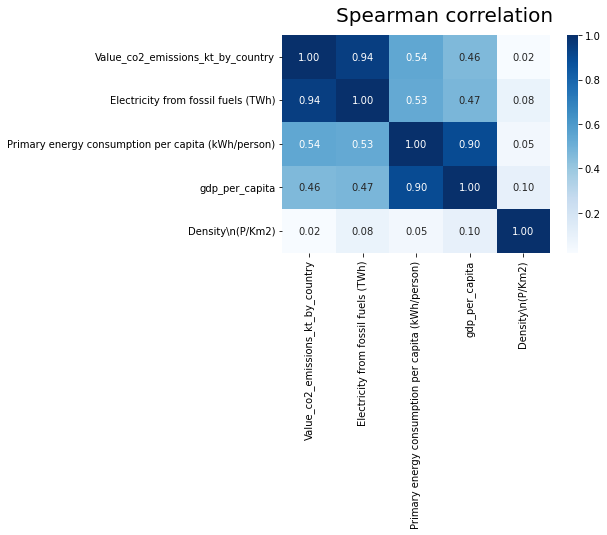

In [10]:
# plotting Spearman correlation coefficients between features

sns.heatmap(corr, cmap= 'Blues', annot= True, fmt= ".2f")

plt.suptitle('Spearman correlation', fontsize= 20)
plt.show()

Por supuesto lineal de ausencia de colinealidad, descartamos trabajar con "Electricity from fossil fuels (TWh)" ya que tiene una muy fuerte correlación lineal con "Value_co2_emissions_kt_by_country". Nos quedamos con esta segunda variable siendo que la consideramos indudablemente más informativa para el problema a abordar.

In [11]:
# checking missing data in the entire dataset

df_inputs.isnull().sum()

Value_co2_emissions_kt_by_country                     428
Electricity from fossil fuels (TWh)                    21
Primary energy consumption per capita (kWh/person)      0
gdp_per_capita                                        282
Density\n(P/Km2)                                        1
dtype: int64

En el caso de "Primary energy consumption per capita (kWh/person)" Vs. "gdp_per_capita", nos quedamos con la primera, ya que no contiene datos faltantes.

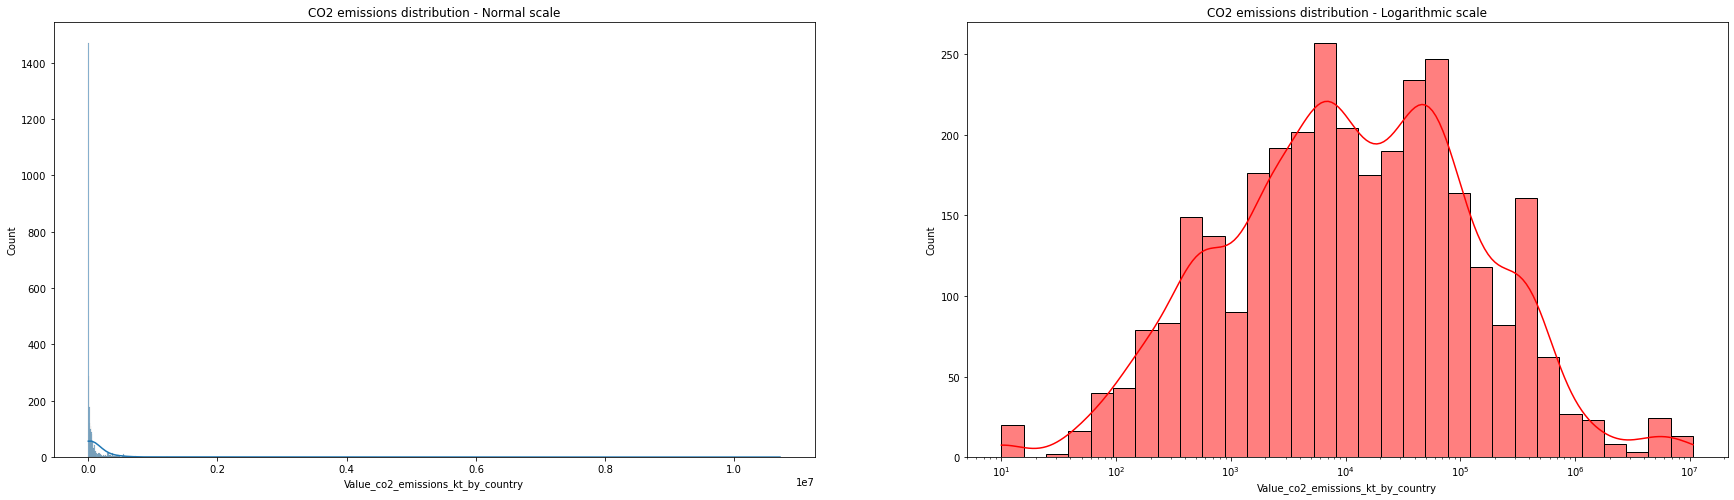

In [12]:
# plotting Value_co2_emissions_kt_by_country distribution in both normal scale and log-scale

fig, axes = plt.subplots(nrows= 1, ncols= 2,figsize=(30,8))

sns.histplot(x= df.Value_co2_emissions_kt_by_country, kde= True, log_scale= False, ax=axes[0]) 
sns.histplot(x= df.Value_co2_emissions_kt_by_country, color='red', kde= True, log_scale= True, ax=axes[1])
axes[0].set_title('CO2 emissions distribution - Normal scale') 
axes[1].set_title('CO2 emissions distribution - Logarithmic scale') 

plt.show()

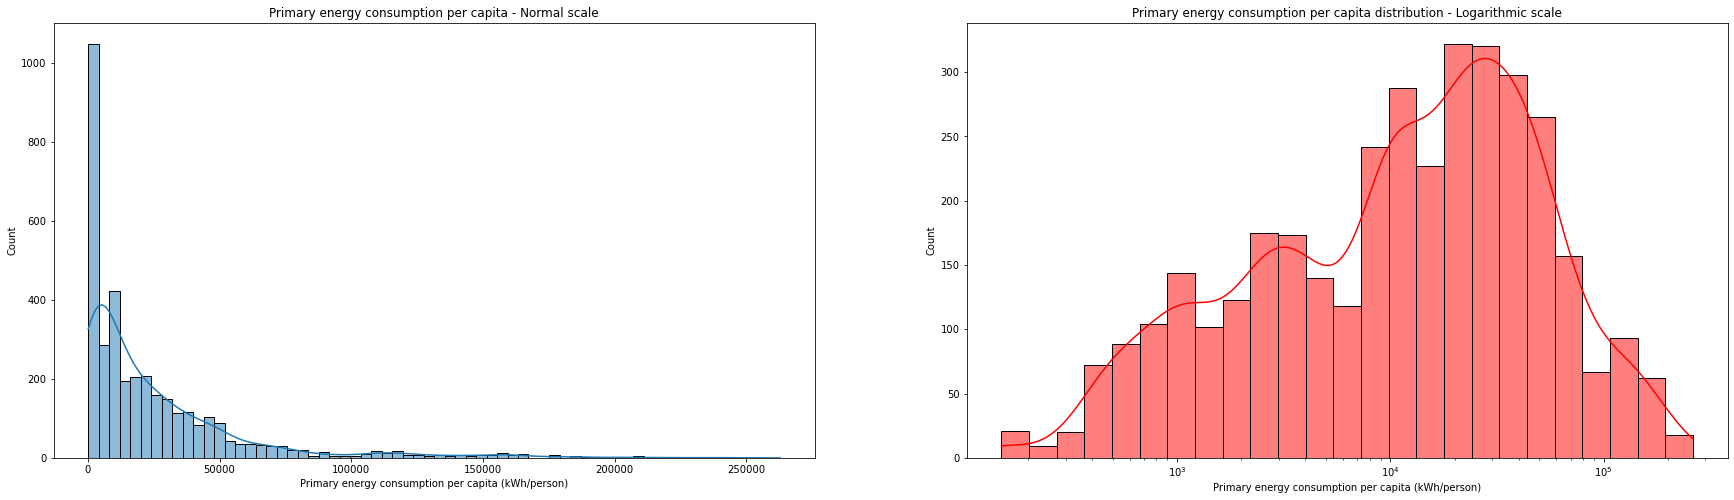

In [13]:
# plotting Primary energy consumption per capita distribution in both normal scale and log-scale

df.loc[:,"Primary energy consumption per capita (kWh/person)"]= df.loc[:,"Primary energy consumption per capita (kWh/person)"].apply(lambda x: x + 150) 

fig, axes = plt.subplots(nrows= 1, ncols= 2,figsize=(30,8))

sns.histplot(x= df.loc[:,"Primary energy consumption per capita (kWh/person)"], kde= True, log_scale= False, ax=axes[0]) 
sns.histplot(x= df.loc[:,"Primary energy consumption per capita (kWh/person)"], color='red', kde= True, log_scale= True, ax=axes[1])
axes[0].set_title('Primary energy consumption per capita - Normal scale') 
axes[1].set_title('Primary energy consumption per capita distribution - Logarithmic scale') 

plt.show()

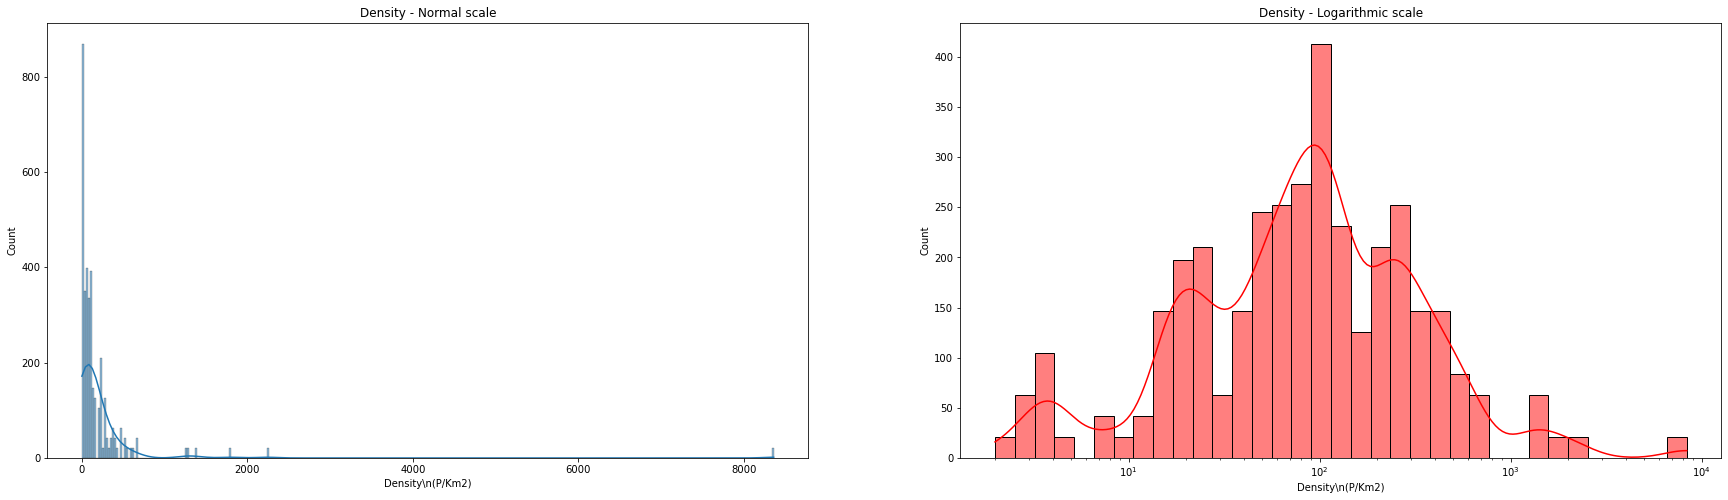

In [14]:
# plotting Density\n(P/Km2) distribution in both normal scale and log-scale

fig, axes = plt.subplots(nrows= 1, ncols= 2,figsize=(30,8))

sns.histplot(x= df.loc[:, r'Density\n(P/Km2)'], kde= True, log_scale= False, ax=axes[0]) 
sns.histplot(x= df.loc[:, r'Density\n(P/Km2)'], color='red', kde= True, log_scale= True, ax=axes[1])
axes[0].set_title('Density - Normal scale') 
axes[1].set_title('Density - Logarithmic scale') 

plt.show()

***

### Limpieza y preparación de datos / ingeniería de features

In [15]:
# checking missing data in the entire dataset

df_inputs= df_inputs.drop(columns=['Electricity from fossil fuels (TWh)','gdp_per_capita'])

df_inputs.isnull().sum()

Value_co2_emissions_kt_by_country                     428
Primary energy consumption per capita (kWh/person)      0
Density\n(P/Km2)                                        1
dtype: int64

Suponemos **MNAR** (*Missing Not At Random*) debido a que es posible que haya menos datos de los países más pequeños y menos populares. 
Cabe mencionar que debido a estos supuestos, es muy probable que tengan una mucha menor injerencia sobre las emisiones de CO2 globales.

In [16]:
# checking Value_co2_emissions_kt_by_country missing values

co2_missing_values= df.Value_co2_emissions_kt_by_country.isnull().sum()
total_values= len(df)

co2_missing_values_perc= ( co2_missing_values/total_values)*100

print(f'We are missing {co2_missing_values_perc:.2f}% of Value_co2_emissions_kt_by_country values.')

We are missing 11.73% of Value_co2_emissions_kt_by_country values.


In [17]:
# checking Primary energy consumption per capita missing values

p_energy_missing_values= df.loc[:,"Primary energy consumption per capita (kWh/person)"].isnull().sum()

p_energy_missing_values_perc= ( p_energy_missing_values/total_values)*100

print(f'We are missing {p_energy_missing_values_perc:.2f}% of Primary energy consumption per capita (kWh/person) values.')

We are missing 0.00% of Primary energy consumption per capita (kWh/person) values.


In [18]:
# checking Density\n(P/Km2) missing values

den_missing_values= df.loc[:, r'Density\n(P/Km2)'].isnull().sum()

den_missing_values_perc= ( den_missing_values/total_values)*100

print(f'We are missing {den_missing_values_perc:.2f}% of Density(P/Km2) values.')

We are missing 0.03% of Density(P/Km2) values.


La columna Value_co2_emissions_kt_by_country se ve afectada en más de un 5%, por lo que es probable que agreguemos *sesgo* rellenándola.

**1.** Podemos utilizar una **imputación por valor arbitrario**, siendo que suponemos **MNAR**. 

**2.** También podemos utilizar **MICE** (Multiple Imputation by Chained Equations).


In [19]:
# imputing with constant value

from sklearn.impute import SimpleImputer

df_constant_imputed= df[[r'Density\n(P/Km2)','Value_co2_emissions_kt_by_country']]
df_constant_imputed_cols= list(df_constant_imputed.columns) + [r'Density\n(P/Km2)_imputed', 'Value_co2_emissions_kt_by_country_imputed']

imputer = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value= 0, add_indicator=True)

df_constant_imputed_array= imputer.fit_transform(df_constant_imputed)

df_constant_imputed= pd.DataFrame(df_constant_imputed_array, columns= df_constant_imputed_cols)

df_constant_imputed.insert(0, 'Primary energy consumption per capita (kWh/person)', df['Primary energy consumption per capita (kWh/person)'])

df_constant_imputed.head()

,Primary energy consumption per capita (kWh/person),Density\n(P/Km2),Value_co2_emissions_kt_by_country,Density\n(P/Km2)_imputed,Value_co2_emissions_kt_by_country_imputed
0,452.59482,60.0,760.000000,0.0,0.0
1,386.89185,60.0,730.000000,0.0,0.0
2,360.86215,60.0,1029.999971,0.0,0.0
3,379.96822,60.0,1220.000029,0.0,0.0
4,354.23125,60.0,1029.999971,0.0,0.0


In [20]:
# checking missing values

df_constant_imputed.isna().sum()

Primary energy consumption per capita (kWh/person)    0
Density\n(P/Km2)                                      0
Value_co2_emissions_kt_by_country                     0
Density\n(P/Km2)_imputed                              0
Value_co2_emissions_kt_by_country_imputed             0
dtype: int64

In [21]:
# imputing with MICE

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

df_mice_imputed= df[['Value_co2_emissions_kt_by_country', r'Density\n(P/Km2)', 'Primary energy consumption per capita (kWh/person)']]
df_mice_imputed_cols= list(df_mice_imputed.columns) + [r'Density\n(P/Km2)_imputed', 'Value_co2_emissions_kt_by_country_imputed']

mice_imputer = IterativeImputer(max_iter=100, random_state=3636, n_nearest_features= df_mice_imputed.shape[1], add_indicator= True)

imputed_data = mice_imputer.fit_transform(df[['Value_co2_emissions_kt_by_country', r'Density\n(P/Km2)', 'Primary energy consumption per capita (kWh/person)']])

df_mice_imputed = pd.DataFrame(imputed_data, columns= df_mice_imputed_cols)

df_mice_imputed.head()

,Value_co2_emissions_kt_by_country,Density\n(P/Km2),Primary energy consumption per capita (kWh/person),Density\n(P/Km2)_imputed,Value_co2_emissions_kt_by_country_imputed
0,760.000000,60.0,452.59482,0.0,0.0
1,730.000000,60.0,386.89185,0.0,0.0
2,1029.999971,60.0,360.86215,0.0,0.0
3,1220.000029,60.0,379.96822,0.0,0.0
4,1029.999971,60.0,354.23125,0.0,0.0


In [22]:
# checking missing values

df_mice_imputed.isna().sum()

Value_co2_emissions_kt_by_country                     0
Density\n(P/Km2)                                      0
Primary energy consumption per capita (kWh/person)    0
Density\n(P/Km2)_imputed                              0
Value_co2_emissions_kt_by_country_imputed             0
dtype: int64

A fin de mejorar el entrenamiento del modelo, se utilizarán 2 técnicas de preprocesamiento: **transformación de variables** y **normalización**.

In [23]:
# transforming data using Yeo-Johnson method

from sklearn.preprocessing import PowerTransformer

yj = PowerTransformer(method= 'yeo-johnson', standardize= False)

constant_imputed_transformed_data= yj.fit_transform(df_constant_imputed)
df_constant_imputed_transformed= pd.DataFrame(constant_imputed_transformed_data, columns=df_constant_imputed.columns)
constant_lambdas= yj.lambdas_

mice_imputed_transformed_data= yj.fit_transform(df_mice_imputed)
df_mice_imputed_transformed= pd.DataFrame(mice_imputed_transformed_data, columns=df_mice_imputed.columns)
mice_lambdas= yj.lambdas_

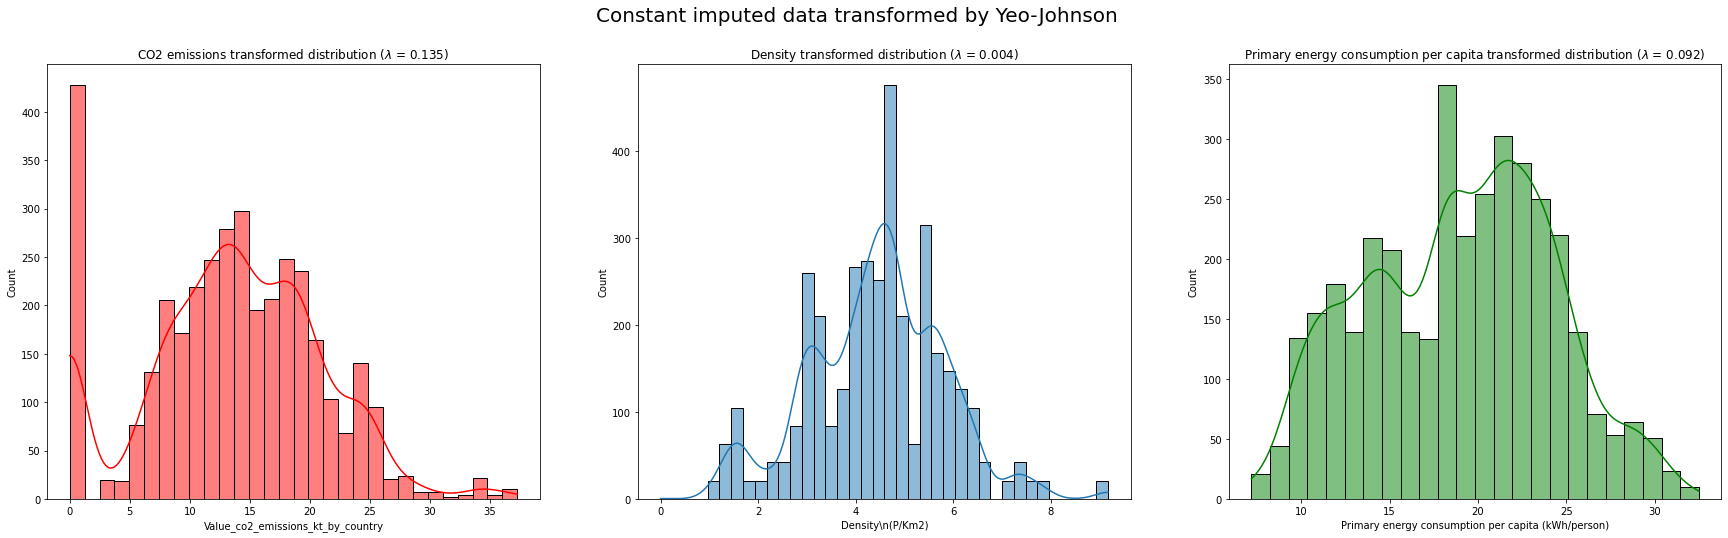

In [24]:
# plotting 3 distributions

fig, axes = plt.subplots(nrows= 1, ncols= 3, figsize= (30,8))

sns.histplot(x= df_constant_imputed_transformed.Value_co2_emissions_kt_by_country, kde= True, color='r', ax=axes[0]) 
sns.histplot(x= df_constant_imputed_transformed.loc[:,r'Density\n(P/Km2)'], kde= True, ax=axes[1]) 
sns.histplot(x= df_constant_imputed_transformed.loc[:,'Primary energy consumption per capita (kWh/person)'], kde= True, color= 'g', ax=axes[2]) 
axes[0].set_title(f'CO2 emissions transformed distribution ($\lambda$ = {constant_lambdas[0]:.3f})') 
axes[1].set_title(f'Density transformed distribution ($\lambda$ = {constant_lambdas[1]:.3f})') 
axes[2].set_title(f'Primary energy consumption per capita transformed distribution ($\lambda$ = {constant_lambdas[2]:.3f})') 

plt.suptitle('Constant imputed data transformed by Yeo-Johnson', fontsize= 20)
plt.show()

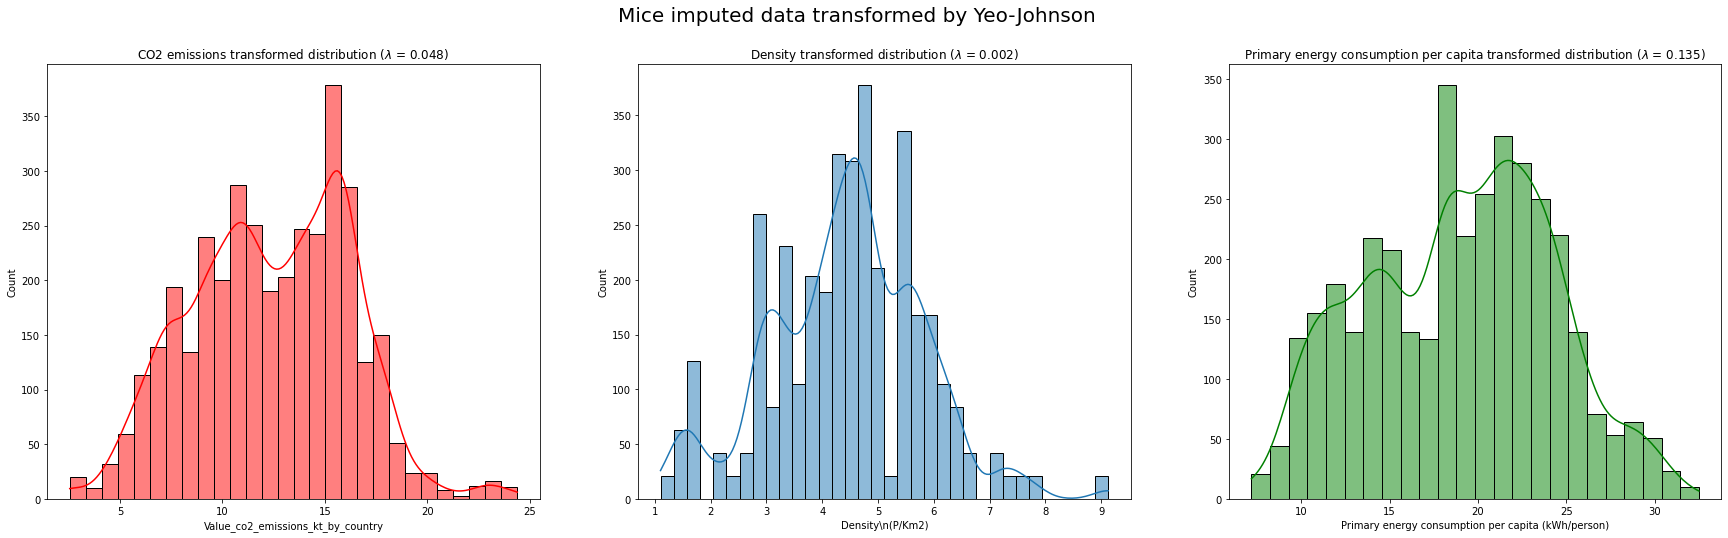

In [25]:
# plotting 3 distributions

fig, axes = plt.subplots(nrows= 1, ncols= 3, figsize= (30,8))

sns.histplot(x= df_mice_imputed_transformed.Value_co2_emissions_kt_by_country, kde= True, color='r', ax=axes[0]) 
sns.histplot(x= df_mice_imputed_transformed.loc[:,r'Density\n(P/Km2)'], kde= True, ax=axes[1]) 
sns.histplot(x= df_mice_imputed_transformed.loc[:,'Primary energy consumption per capita (kWh/person)'], kde= True, color= 'g', ax=axes[2]) 
axes[0].set_title(f'CO2 emissions transformed distribution ($\lambda$ = {mice_lambdas[0]:.3f})') 
axes[1].set_title(f'Density transformed distribution ($\lambda$ = {mice_lambdas[1]:.3f})') 
axes[2].set_title(f'Primary energy consumption per capita transformed distribution ($\lambda$ = {mice_lambdas[2]:.3f})') 

plt.suptitle('Mice imputed data transformed by Yeo-Johnson', fontsize= 20)
plt.show()

In [26]:
# using standardization for scaling data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

constant_imputed_transformed_scaled_data= scaler.fit_transform(df_constant_imputed_transformed)
df_constant_imputed_transformed_scaled= pd.DataFrame(constant_imputed_transformed_scaled_data, columns=df_constant_imputed_transformed.columns)

mice_imputed_transformed_scaled_data= scaler.fit_transform(df_mice_imputed_transformed)
df_mice_imputed_transformed_scaled= pd.DataFrame(mice_imputed_transformed_scaled_data, columns=df_mice_imputed_transformed.columns)

In [27]:
# checking first 5 rows

df_constant_imputed_transformed_scaled.head()

,Primary energy consumption per capita (kWh/person),Density\n(P/Km2),Value_co2_emissions_kt_by_country,Density\n(P/Km2)_imputed,Value_co2_emissions_kt_by_country_imputed
0,-1.785817,-0.222533,-0.590223,-0.016557,-0.364524
1,-1.852543,-0.222533,-0.600130,-0.016557,-0.364524
2,-1.881715,-0.222533,-0.514229,-0.016557,-0.364524
3,-1.860133,-0.222533,-0.470970,-0.016557,-0.364524
4,-1.889436,-0.222533,-0.514229,-0.016557,-0.364524


In [28]:
# checking first 5 rows

df_mice_imputed_transformed_scaled.head()

,Value_co2_emissions_kt_by_country,Density\n(P/Km2),Primary energy consumption per capita (kWh/person),Density\n(P/Km2)_imputed,Value_co2_emissions_kt_by_country_imputed
0,-1.190167,-0.22299,-1.785817,-0.364524,-0.016557
1,-1.204467,-0.22299,-1.852543,-0.364524,-0.016557
2,-1.081314,-0.22299,-1.881715,-0.364524,-0.016557
3,-1.019993,-0.22299,-1.860133,-0.364524,-0.016557
4,-1.081314,-0.22299,-1.889436,-0.364524,-0.016557


***